<h1><center>Tutorial 3: Probability</center></h1>
<div style="text-align: center">Adnane Ez-zizi, 16 Oct 2019</div> 

$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\Var}{\mathrm{Var}}$
$\newcommand{\Cov}{\mathrm{Cov}}$
$\newcommand{\Corr}{\mathrm{Corr}}$

This notebook introduces the elementary concepts from the probability theory that are necessary to understand and build machine learning models. For example, we will cover notions such as a random variable, a probability distribution and independence, as well as useful properties of probability like the chain rule or Bayes theorem. We will also illustrate these notions using Python code. 

## 0. Preliminary steps

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#%precision 3

## 1. Definition of probability

Probability, at its core, refers to the likelihood or the chance that a certain event will occur. For instance, when we roll a fair die, we can intuitively report that there is a probability of $\frac{1}{6}$ that one of the six possible outcomes (1, 2, 3, 4, 5 or 6) will occur. 

Probability, as a field, is branch of mathematics that provides tools to deal and measure uncertainty. In machine learning, we often have to deal with uncertain or stochastic quantities, whether the system that we try to model is assumed inherently stochastic like the trajectory of a subatomic particle, or cannot be completely observed like a robot with a low quality camera trying to identify objects, or because of incomplete modelling like when have to discard some of the information that we have collected (e.g., a robot that discretises the space when making a prediction about the position of an object). 

Before we move to more advanced notions, let's cover some elementary terminology that is commonly used in probability theory:  

- **Experiment:** any process, usually random, that results in one of many possible results. For example in our first example, the toss of a die can be considered as an experiment.  
- **Trial:** one repetition of the process of an experiment. For example, in the experiment of tossing a die 10 times and recording the sequence of results, each toss is considered as a trial. 
- **Outcome:** each distinct possible result of an experiment. For example, in the experiment of tossing a die twice, one possible outcome is (3,5) where 3 is the result from the first trial and 5 is the result from the second trial.  
- **Event:** consists of one or more outcomes. For example, in the experiment of tossing on die, drawing an even number can be considered as an event, which has 3 possible outcomes (2, 4 and 6).
- **Sample space** set of all possible outcome. For the die experiment, the sample space is {1,2,3,4,5,6}.

In mathematical notation, the probability of an event E is often denoted as $P(E)$ or $Pr(E)$.

## 2. Random variables

A random variable is a function that maps a possible outcome of a random process to a real number. For example, we can define a random variable that represents the outcome from a die roll, $X \in \{1,2,3,4,5,6\}$, or the sum of the outcomes from rolling two dice, $Y \in \{1,2,\cdots,12\}$. 

Once we have defined a random variable, we can talk about its probability of taking a certain value or of taking a value in a given interval. Thus, the probability of observing a 3 when we roll a die is expressed as $P(X = 3)$, while the probability of observing an even outcome can be expressed as $P(X \in \{2,4,6\})$.   

There are two types of random variables: discrete and continuous. A random variable is said to be discrete if it takes a finite or countably infinite number of values such as the variable $X$ representing the die roll's outcome. A continous random variable can take real values such as the value of a share in a stock exchange market.

## 3. Discrete variables

### 3.1. Probability mass function

The probability mass function, or distribution of a discrete random variable $X$ maps the possible values of $X$ ($x_1, x_2, \dots$) to their probabilities. We will denote a probability mass function by a lower-cased $p(.)$: $p(x_i) = P(X = x_i)$ for all possible values $x_i$'s of X.

For example, the probability mass function of the random variable $X$ that represents a die roll outcome is defined by: 
\begin{equation}
p(x) = P(X = x) = \frac{1}{6} \;\; \text{for} \; x \in \{1, 2, 3, 4, 5, 6\}
\end{equation}

A probability mass function $p$ of a random variable $X$ must satisfy 3 conditions:

1. The domain of $p$ must be the set of all possible outcomes of $X$.
2. for all possible values $x$ of $X$, $0\leq p(x) \leq 1$, where $p(x) = 0$ if $x$ can never occur (impossible outcome) and $p(x) = 1$ if $x$ always occur.  
3. $\sum_{x} {p(x)} = 1$, that is, the probabilities of all possible outcomes sum to 1. 

### 3.2. Expectation and variance

#### Expectation

The expectation or expected value (or mean) of a discrete random variable $X$ is defined as:
$\E(X) = \sum_{i} {x_ip(x_i)}$. In other words, the expectation is a weighted average of the possible values $x_i$ with weights $p(x_i)$, similar to a center of mass in physics. It gives us an idea about the central value taken by the random variable.

For the die roll example above, the expectation is equal to:
\begin{equation}
\E(X) = 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + 3 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 6 \cdot \frac{1}{6} = \frac{21}{6} = 3.5
\end{equation}

The expectation has a few properties:
- The expectation of a deterministic value is equal to the value itself: $\E(x) = x$, where x is a non-random value.
- The expectation is a linear function, that is: $\E(aX + bY) = a\E(X) + b\E(Y)$.
- $\E(f(X)) = \sum_{i} {f(x_i)p(x_i)}$

#### Variance

The variance provides a measure of how much the values of a random variable $X$ vary as we sample different values of $X$ from its probability distribution. Mathematically, it is defined as: $\Var(X) = \E(\left[X - \E(X)\right]^2) = \E(X^2) - \E(X)^2$. For instance, the variance of $X$ in the die roll example is given by: 
\begin{equation}
\Var(X) = \E(X^2) - \E(X)^2 = (1^2 \cdot \frac{1}{6} + 2^2 \cdot \frac{1}{6} + 3^2 \cdot \frac{1}{6} + 4^2 \cdot \frac{1}{6} + 5^2 \cdot \frac{1}{6} + 6^2 \cdot \frac{1}{6}) - \frac{21}{6} = \frac{71}{6} 
\end{equation}

The variance has a few properties:
- The variance of a deterministic value is equal to 0: $\Var(x) = 0$, where $x$ is a non-random value.
- The variance preserves the sum: $\Var(X + Y) = \Var(X) + \Var(Y)$.
- The variance is a non linear function for the multiplication by a scalar: $\Var(aX) = a^2\Var(X)$.
- $\Var(f(X)) = \E(f(X)^2) - \E(f(X))^2$

The standard deviation is a related measure defined as the square root of the variance: $SD(X) = \sqrt{\Var(X)}$.

### 3.3. Some popular discrete probability distributions 

#### Bernoulli distribution 

Suppose that we run a random experiment whose outcome can be classified as either a success or a failure. An example of such an experiment is tossing a fair coin where a head is considered as success and tail as failure. If we let $X = 1$ when the outcome is a success (e.g. head) and $X = 0$ when it is a failure (e.g. tail), then the probability mass function of $X$ is given by: 
\begin{aligned}
& p(0) = P(X = 0) = 1 − p\\
& p(1) = P(X = 1) = p
\end{aligned}
where $p$ is the probability that the experiment is a success ($0\leq p\leq 1$).

A random variable $X$ is said to be a Bernoulli random variable if its probability mass function is given by the equations
shown just above for some $p \in (0, 1)$. We also say that $X$ follows a Bernoulli distribution with parameter $p$ and write this mathematically as $X \sim Bernoulli(p)$. 

In [5]:
# Mass function of a Bernoulli(0.7) distribution
print('p(0) ={p0: 1.1f}'.format(p0 = stats.bernoulli.pmf(0, p = 0.7)))
print('p(1) ={p0: 1.1f}'.format(p0 = stats.bernoulli.pmf(1, p = 0.7)))

p(0) = 0.3
p(1) = 0.7


We can draw samples from a Bernoulli distribution, using the function `stats.bernoulli.rvs()`. For example, if we want to draw 10 values from a $Bernoulli(0.7)$ distribution, we would use:

In [ ]:
# Draw 10 values from a Bernoulli variable with p = 0.7
stats.bernoulli.rvs(p = 0.7, size = 10)

The expection and variance of a random variable $X \sim Bernoulli(p)$ can be computed in a straightforward manner as:
\begin{align}
& \E(X) = 0 \cdot p(0) + 1 \cdot p(1) = p\\
& \Var(X) = E(X^2) - E(X)^2 = (0^2 \cdot p(0) + 1^2 \cdot p(1)) - p^2 = p(1-p)
\end{align}

In [ ]:
# Expectation and variance of a X ~ Bernoulli(0.7)
print('E(X) ={exp: 1.2f}'.format(exp = stats.bernoulli.mean(p = 0.7)))
print('Var(X) ={var: 1.2f}'.format(var = stats.bernoulli.var(p = 0.7)))

#### Binomial distribution 

Suppose now that we perform an experiment with $n$ independent trials, each of which results in a success with probability $p$ and in a failure with probability $1 − p$. If $X$ represents the number of successes that occur in the $n$ trials, then $X$ is said to be a binomial random variable with parameters $(n, p)$. A Bernoulli random variable is thus just a binomial random variable with parameters $(1, p)$. 

The probability mass function of a binomial random variable, $X$, having parameters $(n, p)$ (we can write $X \sim B(n,p)$), is given by:
\begin{equation}
p(i) = {n \choose i} p^i (1 − p)^{n−i} \quad i = 0, 1,\dots, n
\end{equation}
where ${n \choose i}$ is the number of possible combinations that result from randomly drawing $i$ objects out of $n$ different objects. Mathematically, ${n \choose i} = \frac{n!}{i!\,(n-i)!}$, where $k! = k\times(k-1)\times(k-2)\dots\times1$. 

In [6]:
# Mass function of a B(6,0.5) distribution
for i in range(7):
    print('p({j:d}) = {p0:1.4f}'.format(j = i, p0 = stats.binom.pmf(i, n = 6, p = 0.5)))

p(0) = 0.0156
p(1) = 0.0938
p(2) = 0.2344
p(3) = 0.3125
p(4) = 0.2344
p(5) = 0.0938
p(6) = 0.0156


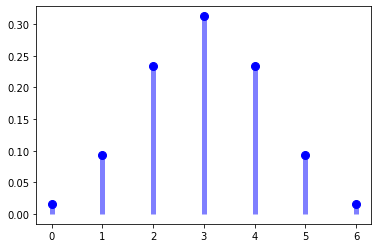

In [7]:
# Plor of the mass function 
fig, ax = plt.subplots(1, 1)
n, p = 6, 0.5
x = list(range(7))
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

In code, to draw samples from a Binomial distribution, we can call `stats.binom.rvs()`. For example, drawing 3 values from a $B(6, 0.5)$ distribution can be done using the following code:

In [9]:
# Draw 3 values from a variable following a B(6, 0.5) 
print(stats.binom.rvs(n = 6, p = 0.5, size = 3))

[3 5 1]


This means that we got 4 successes ($X = 1$) in each of the first two draws, and got 2 successes in the last draw. 
The expection and variance of a random variable $X \sim B(n,p)$ are given by:
\begin{align}
& \E(X) = np\\
& \Var(X) = p(1-p)
\end{align}

In [10]:
# Expectation and variance of a X ~ B(6, 0.5)
print('E(X) ={exp: 1.1f}'.format(exp = stats.binom.mean(n = 6, p = 0.5)))
print('Var(X) ={var: 1.1f}'.format(var = stats.binom.var(n = 6, p = 0.5)))

E(X) = 3.0
Var(X) = 1.5


## 4. Continuous variables

### 4.1. Probability density function

When working with a continuous random variable, we no longer want to find the probability that the variable take a specific value such as asking what is the probability that the value of a certain share in a financial market is exactly £100.684, since this probability will virtually be 0. Instead, we are more interested in the probability that the continuous random variable lies in a certain interval. For that, we normally describe the distribution of a random variable using a probability density function instead of a probability mass function. More specifically, a function $f$ is said to be the density of a random variable $X$ if, for any interval $I$, $P(X \in I) = \int_{I}{f(x)dx}$.

In general, a function $f$ must satisfy 3 conditions to be considered as a density function of a random variable $X$:

1. The domain of $f$ must be the set of all possible outcomes of $X$.
2. for all possible values $x$ of $X$, $f(x) \geq 0$.
3. $\int{f(x)dx} = 1$.

### 4.2. Expectation and variance

#### Expectation

The definition of expectation in the case of continuous random variables is very similar to that in the discrete case, where we only have to replace the summation with integration, and the probability mass function with the probability density function. More specifically, if $X\sim f$ (meaning that X follows a distribution whose density function is $f$) and the domain of $X$ is $\mathcal{X}$, then: $\E(X) = \int_{\mathcal{X}} {xf(x)dx}$. 

#### Variance

For variance, the definition remains the same: $\Var(X) = \E(\left[X - \E(X)\right]^2) = \E(X^2) - \E(X)^2$.

### 4.3. Cumulative distribution function

Let $X$ be a random variable. The function $F$ defined by: 

\begin{equation}
F(x) = P(X \leq x), \quad -\infty \leq x\leq \infty
\end{equation}

is called the cumulative distribution function of $X$. Thus, $F$ specifies, for all real values $x$, the probability that the random variable is less than or equal to $x$.

Similarly to the probability density function, the cumulative distribution function $F$ describes fully the distribution of a random variable, with the additional advantage that it can work with any type of random variables (discrete or continuous). Actually, F can be obtained from $f$, the probability density function, using the formulas: $F(x) = \int{f(t)dt}$ 

The One interesting property of $F$ is that it is a nondecreasing function; that is, if $a < b$, then $F(a) \leq F(b)$.

### 4.4. Some popular continuous probability distributions 

#### Uniform distribution 
 
A random variable $X$ is said to be uniformly distributed over the interval $(a, b)$, noted in short as $X \sim U(a,b)$, if $X$ is equally likely to fall anywhere in this interval. The probability density function of such random variable is given by:
\begin{equation}
f(x) =
\left\{
	\begin{array}{ll}
		\frac{1}{b-a}  & \mbox{if } a\leq x\leq b \\
		0 & \mbox{otherwise } 
	\end{array}
\right.
\end{equation}

In [13]:
# density function of a U(0,1) distribution
print('f(-0.2) = {fx:1.1f}'.format(fx = stats.uniform.pdf(-0.2, loc = 0, scale = 1)))
print('f(0) = {fx:1.1f}'.format(fx = stats.uniform.pdf(0, loc = 0, scale = 1)))
print('f(0.3) = {fx:1.1f}'.format(fx = stats.uniform.pdf(0.1, loc = 0, scale = 1)))
print('f(1) = {fx:1.1f}'.format(fx = stats.uniform.pdf(1, loc = 0, scale = 1)))
print('f(4.5) = {fx:1.1f}'.format(fx = stats.uniform.pdf(4.5, loc = 0, scale = 1)))

f(-0.2) = 0.0
f(0) = 1.0
f(0.3) = 1.0
f(1) = 1.0
f(4.5) = 0.0


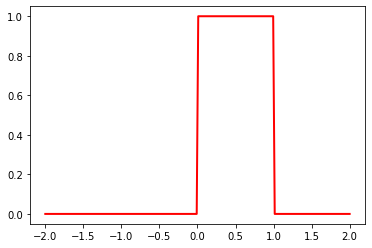

In [14]:
# Plot of the density function 
fig, ax = plt.subplots(1, 1)
a, b = 0, 1
x = np.linspace(-2, 2, 200)
ax.plot(x, stats.uniform.pdf(x, loc = a, scale = b), 'r-', lw=2, label='frozen pdf')
plt.show()

In code, to draw samples from a Uniform distribution, we can call `stats.uniform.rvs()`. For example, drawing 10 values from a $U(0, 1)$ distribution can be done using the following code:

In [ ]:
# Draw 10 values from a variable following a U(0, 1) 
stats.uniform.rvs(loc = 0, scale = 1, size = 10)

Since $F(x) = \int{f(t)dt}$, it follows from the above equation that the distribution function of a uniform random variable on the interval $(a, b)$ is given by:
\begin{equation}
F(x) =
\left\{
	\begin{array}{ll}
		0  & \mbox{if } x< a \\
		\frac{x-a}{b-a}  & \mbox{if } a\leq x\leq b \\
        1 & \mbox{otherwise } 
	\end{array}
\right.
\end{equation}

The expectation and variance of the $U(a,b)$ distribution are given by:
\begin{align}
& \E(X) = \frac{a+b}{2}\\
& \Var(X) = \frac{(b-a)^2}{12}
\end{align}

In [15]:
# Expectation and variance of a X ~ U(0, 1)
print('E(X) ={exp: 1.1f}'.format(exp = stats.uniform.mean(loc = 0, scale = 1)))
print('Var(X) ={var: 1.4f}'.format(var = stats.uniform.var(loc = 0, scale = 1)))

E(X) = 0.5
Var(X) = 0.0833


#### Normal distribution

$X$ is said to be a normal random variable (or normally distributed), with parameters $\mu$ and $\sigma^2$ if the density of $X$ is given by:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x-\mu)^2\right)
\end{equation}

In short, we denote a normal distribution with parameters $\mu$ and $\sigma^2$ by $\mathcal{N}(\mu,\sigma^2)$, so we will also write as before $X \sim \mathcal{N}(\mu,\sigma^2)$ to introduce a normal random variable $X$.

In [16]:
# density function of a N(0,1) distribution
print('f(-1.96) = {fx:1.2f}'.format(fx = stats.norm.pdf(-1.96, loc = 0, scale = 1)))
print('f(0) = {fx:1.2f}'.format(fx = stats.norm.pdf(0, loc = 0, scale = 1)))
print('f(1.96) = {fx:1.2f}'.format(fx = stats.norm.pdf(1.96, loc = 0, scale = 1)))
print('f(1) = {fx:1.2f}'.format(fx = stats.norm.pdf(1, loc = 0, scale = 1)))

f(-1.96) = 0.06
f(0) = 0.40
f(1.96) = 0.06
f(1) = 0.24


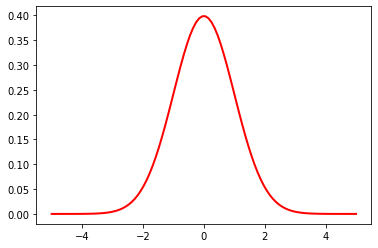

In [11]:
# Plot of the density function 
fig, ax = plt.subplots(1, 1)
mu, sigma = 0, 1
x = np.linspace(-5, 5, 100)
ax.plot(x, stats.norm.pdf(x, loc = mu, scale = sigma), 'r-', lw=2, label='frozen pdf')
plt.show()

In code, to draw samples from a Uniform distribution, we can call `stats.uniform.rvs()`. For example, drawing 10 values from a $U(0, 1)$ distribution can be done using the following code:

In [17]:
# Draw 10 values from a variable following a N(0, 1) 
stats.norm.rvs(loc = 0, scale = 1, size = 10)

array([-1.07286337, -0.02047795, -1.0892859 ,  0.63307728, -0.71625438,
       -0.43093896, -0.09998078, -0.32279445, -0.98224144, -1.03249923])

The expectation and variance of a normally distributed random variable, $X \sim \mathcal{N}(\mu,\sigma^2)$, are respectively equal to the paramters of the distribution, that is: $\E(X) = \mu$ and $\Var(X) = \sigma^2$. In other words a normal distribution is completely specified using its expectation and variance.

In [18]:
# Expectation and variance of a X ~ U(0, 1)
print('E(X) ={exp: 1.1f}'.format(exp = stats.norm.mean(loc = 0, scale = 1)))
print('Var(X) ={var: 1.1f}'.format(var = stats.norm.var(loc = 0, scale = 1)))

E(X) = 0.0
Var(X) = 1.0


## 5. Joint and conditional distributions

### 5.1. Joint probability

Up to now, we have only discussed probability distributions for single random variables. But what if we are interested in the outcomes of two or more random variables? For example, suppose we toss two fair coins and wants to know the probability that the first coin turns up head and the second turns up tail, or in a formal way, $P(X_1 = H, X_2 = T)$, where $X_1$ and $X_2$ respectively represent the outcome of the first and second coin. Let's write the probabilities of all possible joint outcomes in a table:

outcome | probability
---- | -------
HT | 1/4
HH | 1/4
TH | 1/4
TT | 1/4

What we just did is to define a joint probability distribution for the random variables $X_1$ and $X2$. Technically, as before, we can talk either about a joint probability mass function in the case of discrete variables or joint probability density function (or cumulative distribution function) when the variables are continuous. 

#### Joint probability mass function (discrete case):

Assume we have two discrete random variables $X$ and $Y$, which can take on values $x_1, x_2, \dots$ and $y_1, y_2, \dots$, respectively. Their joint probability mass function is defined as:

\begin{equation}
p(x_i, y_i) = P(X = x_i, Y = y_i) \; \text{for all possible values $x_i$'s and $y_i$'s of $X$ and $Y$}.
\end{equation}

A joint probability mass function $p$ of a random variable $X$ must satisfy the same 3 conditions seen before for a standard mass function:

1. The domain of $p$ must be the set of all possible joint outcomes of $X$ and $Y$.
2. for all possible values $x$ of $X$ and $y$ of $Y$, $0\leq p(x, y) \leq 1$
3. $\sum_{x,y} {p(x,y)} = 1$, that is, the probabilities of all possible outcomes sum to 1. 

One of the widely-used joint distributions is the [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution), which generalises the binomial distribution when we are interested in the probability of any possible combination of number of success of each of $k$ categories (instead of two) in $n$ independent trials. For example, say we roll a 6-sided die $n$ times independently. The multinomial distribution would then give the probabiliy of counts of each of the 6 sides (here, $k=6$). The parameters of a multinomial are: $n$, the number of independent trials and $p_1, \dots, p_k$ the probabilities of successes of each of the $k$ categories to compute the count of successes for. We thus often denote the multinomial distribution by $Mult(n, p_1, \dots, p_k)$

#### Marginal mass function (discrete case)

If we have a joint distribution of multiple discrete variables, we can extract the mass function of one of the variables by summing over the possible values of the other variables. The obtained distribution of that variable is called marginal distribution. Concretelely, say we have two random variables $X$ and $Y$ that represent the outcomes of coin flips. Their joint mass function is given by:

\begin{equation}
p(i,j) = \frac{1}{4} \;\text{for } i,j \in \{H,T\}
\end{equation}

The marginal mass function of $X$ can be extracted as follows:

\begin{equation}
p(i) = \sum_{j \in \{H,T\}}{p(i,j)} = \frac{1}{4} + \frac{1}{4} = \frac{1}{2}
\end{equation}


#### Joint cumulative and density functions (continuous case):

Joint cumulative distribution function can be easily generalised from the single variable case to the multiple-variable case. If $X$ and $Y$ are two continous random variables, their joint cumulative distribution function is defined as:

\begin{equation}
F(x, y) = P(X \leq x, Y \leq y), \quad -\infty \leq x,y\leq \infty
\end{equation}

We say that $f$ is the joint probabiliy density function of $X$ and $Y$ if, for any interval $I$ and $J$, $P(X \in I, Y \in J) = \int_{I,J}{f(x,y)dxdy}$. The density function $f$ also satisfies the same 3 conditions seen in the case of a single variable, that is:

1. The domain of $f$ must be the set of all possible joint outcomes of $X$ and $Y$.
2. for all possible values $x$ of $X$ and $y$ of $Y$, $f(x, y) \geq 0$.
3. $\int{f(x,y)dxdy} = 1$.

#### Marginal density function (continous case)

As in the discrete case, if we have a joint distribution of two (or multiple) continuous random variables $X$ and $Y$, we can marginalizing over $Y$ to get the marginal distrubution of $X$. This is done by integrating over the values of $Y$:

\begin{equation}
f(x) = \int{f(x,y)dy}
\end{equation}

### 5.2. Conditional probability

#### Definition

We often want to know the probability of one event, given that we know another event is true. For instance, given that a house is located in a posh area, what is the probability that its price is greater than £500,000. This is refered to as a conditional probability, and in our case, we write it as $P(\text{price } > 500000 \text{ | area is posh})$. 

If we know the joint distribution of two random variables, then we can get the conditional distribution of one variable given the other variable as follows:

- In the discrete case, the conditional mass function of $X$ given $Y$ is equal to: $p(x|y) = \frac{p(x,y)}{p(y)} = \frac{p(x,y)}{\sum_{x}{p(x,y)}}$  

- In the continuous case, the conditional density function of $X$ given $Y$ is equal to: $f(x|y) = \frac{f(x,y)}{f(y)} = \frac{f(x,y)}{\int{f(x,y)dx}}$  

The definition can be extended easily to the case of more than two variables by simply replacing one of the variable in the formula with the multiple variables that we want to condition on or compute the conditial distribution for. 

#### Chain rule

Any joint probability distribution over many random variables may be decomposed into conditional distributions over only one variable: 

\begin{equation}
P(x_1, \cdots , x_n) = P(x_n|x_{n-1}, \cdots, x_1)P(x_{n-1}|x_{n-2}, \cdots, x_1) \cdots P(x_2|x_1)  P(x_1) 
\end{equation}

Thus, for example, we have: 

\begin{equation}
P(x,y,z) = P(x|y,z)P(y|z)P(z) 
\end{equation}

#### Bayes theorem

Bayes theorem, named after the reputable Mathematician Thomas Bayes, is a simple yet a powerful formula that allows to flip a conditional probability. It basically states that: 

\begin{equation}
p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\sum_y{p(x|y)p(y)}}
\end{equation}

One major application of Bayes theorem is to compute the probability of a model (or the parameters of the model to be more precise) given some data. Knowing the model, we can determine the probability of the data given a specific set of model parameters. Bayes’ rule allows us to get from the probability of the data given the model $P(data|model)$, to the probability of the model given the data $P(model|data)$. In other words, it allows us to estimate the parameters of a model having collected a set of data. 

### 5.3. Independence and conditional independence

#### Independence

Two random variables $X$ and $Y$ are said to be independent (often denoted as $X\perp Y$) if the values taken by one of the variables have no influence in the values taken by the other variable. Formally, this can be expressed using conditional probabilities as: $p(x|y) = p(x)$ in the discrete case, or $f(x|y) = f(x)$ in the continous case.

knowing that $p(x|y) = \frac{p(x,y)}{p(y)}$ 

then $\frac{p(x,y)}{p(y)} = p(x)$ 

which means that $p(x,y) = p(x)p(y)$

Actually, in textbooks of probability, you often find that independence is introduced using the last formula instead of using conditional probabilities.

#### Conditional independence

Two random variables $X$ and $Y$ are conditionally independent given a random variable $z$ (denoted as $X\perp Y \;|\; Z$) if the conditional joint mass (or density) function of $X$ and $Y$ is equal to the product of the conditional mass (or density) functions of the two random variables:

\begin{equation}
p(x,y|z) = p(x|z)p(y|z)
\end{equation}

### 5.4. Covariance and correlation

#### Covariance

The covariance between $X$ and $Y$, denoted by $\Cov(X,Y)$, is defined by

\begin{equation}
\Cov(X,Y) = \E\left[(X-\E(X)) (Y-\E(Y))\right]
\end{equation}

The covariance has a few properties:
- The covariance is symmetric: $\Cov(X,Y) = \Cov(Y,X)$
- The covariance is a linear function of each argument, that is: $\Cov(aX,Y) = a\,\Cov(Y,X)$.
- If $X$ and $Y$ are independent, then $\Cov(X,Y) = 0$. 

#### Correlation

The correlation of two random variables $X$ and $Y$, denoted by $\Corr(X,Y)$, is defined by:

\begin{equation}
\Corr(X,Y)= \frac{\Cov(X,Y)}{\sqrt{\Var(X)\Var(Y)}}
\end{equation}

where $\Var(X)$ and $\Var(Y)$ are strictly positive. One can show that $-1\leq\Corr(X,Y)\leq 1$

The correlation coefficient is a measure of the degree of linearity between $X$ and $Y$. A value of $\Corr(X,Y)$ near $1$ or $−1$ indicates a high degree of linearity between $X$ and $Y$, whereas a value near $0$ indicates that such linearity is absent. A positive value of $\Corr(X,Y)$ indicates that $Y$ tends to increase when $X$ does, whereas a negative value indicates that $Y$ tends to decrease when $X$ increases. If $\Corr(X,Y) = 0$, then $X$ and $Y$ are said to be uncorrelated.

## 6. Law of large numbers, Central limit theorem

Here we will cover two of the most fundamental theorems in Probability

### 6.1. Law of large numbers

Suppose that we have a collection of random variables $X_1, X_2, \cdots, X_n$ that are independent and identically distributed. The strong law of large numbers states that as the number of random variables increase ($n\to \infty$), the empirical average of the random variables will get closer to the true common expected value of the variables normal distribution:

\begin{equation}
\frac{1}{n}\sum_{i=1}^n{X_i} \xrightarrow[n\to \infty]{} \E(X)
\end{equation}

where the convergence is almost sure, that is:

\begin{equation}
P\left( \lim_{n \to \infty} \frac{1}{n}\sum_{i=1}^n{X_i} = \E(X) \right) = 1
\end{equation}

### 6.2. Central limit theorem

Let's $X_1, X_2, \cdots, X_n$ be a collection of random variables that are independent and identically distributed. The central limit theorem states that if we sum them up, then the larger the collection, the closer the sum will be to a normal distribution. Mathematically, this is translated as:

\begin{equation}
\frac{1}{\sqrt{n}} \sum_{i=1}^n \frac{X_i - \mu}{\sigma} \xrightarrow[n\to \infty]{} \mathcal{N}(0, 1) \quad \left(\text{or equivalently}, \sum_{i=1}^n{X_i} \underset{n\to \infty}{\sim} \mathcal{N}\left(\mu, \frac{\sigma}{n}\right)\right)
\end{equation}

where $\mu$ and $\sigma^2$ are respectively the common expectation and variance of the random variables $X_1, X_2, \cdots, X_n$, and the convergence is in law, that is:

\begin{equation}
\lim_{n \to \infty} P\left( \frac{1}{\sqrt{n}} \sum_{i=1}^n \frac{x_i - \mu}{\sigma} \le z \right) = \int_{-\infty}^z
        (1/\sqrt{2 \pi}) \exp(-u^2/2) \, du
\end{equation}